In [53]:
# Boilerplate at top of file
%load_ext autoreload
%load_ext rmagic
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import datetime
import math

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
from ggplot import *



from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import os

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The rmagic extension is already loaded. To reload it, use:
  %reload_ext rmagic


In [51]:
data_dir = '../data/'
left_dir = data_dir + 'look_left_good/events'

In [31]:
df = pd.read_csv(data_dir + 'look_left_good/events/1453773920-0.csv')

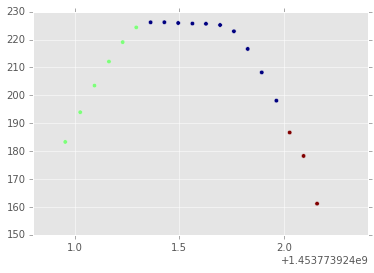

In [34]:
plt.scatter(
    df.time,
    df['noseX'],
    c=df['class']
)

# Extra Features

In [66]:
def generate_signal_features(df):
    row=dict()
    row['signal_length'] = df['time'].max() - df['time'].min()
    row['noseX_delta_max'] = df['noseX'].max() - df['noseX'].min(0)
    row['neutral_count'] = sum(df['class'] == 0)
    return row

In [67]:
events = []
for f in os.listdir(left_dir):
    row = generate_signal_features(pd.read_csv(left_dir + '/'+ f))
    events.append(row)
df_events = pd.DataFrame(events)

In [68]:
df_events

,neutral_count,noseX_delta_max,signal_length
0,10,65.020996,1.203330
1,13,73.922684,1.426049
2,16,75.827454,1.632613
